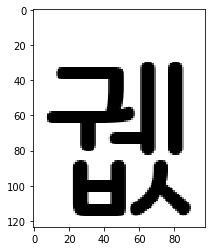

In [4]:
import matplotlib.image as img
import matplotlib.pyplot as plt

fileName = "./syllable/00000000.png"

text = img.imread(fileName)
plt.imshow(text)
plt.show()

In [5]:
# 이미지 너비 & 높이 최소값 구하기

import json
from pathlib import Path
import shutil
from shutil import copytree, Error
from tqdm import tqdm

try:
    with open('printed_data_info.json', 'rt', encoding='UTF8') as json_file:
        try:
            json_data = json.load(json_file)

        except ValueError as ev:
            print("ValueError: {0}".format(ev))
        
        # id값과 file_name 매칭 시키기
        dict_file = {} # img id와 img 파일 네임을 매칭 시킬 딕셔너리
        img_id = [] # img id list
        text_type = [] # img file name list
        
        for i in range(0, len(json_data["annotations"])):
            img_id.append(json_data["annotations"][i]["image_id"])
            text_type.append(json_data["annotations"][i]["attributes"]["type"])
            
        dict_type = dict(zip(img_id, text_type)) # id와 file_name을 dictionary로 만들기
        
        
        # img 분류하기
        img_w_list = []
        img_h_list = []
        
        for i in tqdm(range(0, len(json_data["images"])), desc="진행률"):
            if(dict_type.get(json_data["images"][i]["id"]) == "글자(음절)"):
                #width 리스트
                img_w = json_data["images"][i]["width"]
                img_w_list.append(img_w)
                #height 리스트
                img_h = json_data["images"][i]["height"]
                img_h_list.append(img_h)
            
        width_set = set(img_w_list) #집합set으로 변환
        height_set = set(img_h_list)
        new_widht_list = list(width_set) #list로 변환
        new_heith_list = list(height_set)
        
        print("widht 평균: ", sum(new_widht_list) / len(new_widht_list))
        print("widht 최소: ", min(new_widht_list))
        print("widht 최대: ", max(new_widht_list))
        print("height 평균: ", sum(new_heith_list) / len(new_heith_list))
        print("height 최소: ", min(new_heith_list))
        print("height 최대: ", max(new_heith_list))
        
except OSError as err:
    print("OS error: {0}".format(err))

진행률: 100%|████████████████████████████████████████████████████████████████| 878100/878100 [00:00<00:00, 1312494.95it/s]


widht 평균:  81.5
widht 최소:  45
widht 최대:  118
height 평균:  117.32075471698113
height 최소:  90
height 최대:  212
